# Params
GaussianProcessRegressor(kernel=self.kernel, alpha=0.2, n_restarts_optimizer=50)
algorithm_total_samples = 16
RBF(length_scale=100, length_scale_bounds=(5, 1e06)
        self.max_dist = max(3+self.min_dist, 2*(self.path_len / self.total_number) * self.orginal_max_dist)


In [1]:
%load_ext autoreload
%autoreload 2
    
from manager import * 
import rosnode
import time
from env_utils.algo_constants import *


In [2]:
if '/manager' in rosnode.get_node_names():
    # print("Manager is running")
    rosnode.kill_nodes(['manager'])
    time.sleep(1)

m = Manager(skip_checks=False, 
            debug_flag=True) 
            # fake_hardware_flags=[FAKE_ARM, FAKE_PXRF])
# m.fake_pxrf_values = [0.13, 0.2, 0.0, 0.5, 0.6, 0.05]
# m.fake_pxrf_values = [0.4, 0.2, 0.3, 0, 0.02, 0.5, 0.32, 0.0, 0.6, 0.0, 0.1, 0.0]

[WARN] [1728588589.953953]: Started PXRF


[INFO] [1728588589.955403]:  < Status: Initialization > 
[INFO] [1728588589.999732]:  < Status: Waiting for GPS init > 
[INFO] [1728588590.000642]: Waiting for GPS Initialization...
[INFO] [1728588591.002646]: GPS Full Navigation Achieved!
[INFO] [1728588591.004726]:  < Status: Ready > 
[INFO] [1728588591.012264]:  | Algorithm Set to ADAPTIVE with number of samples = 16
[INFO] [1728588591.013541]:  ----------- READY ----------- 


[WARN] [1728588607.137583]: | Reset 


[INFO] [1728588607.216766]: ----------------
 Boundary Points:
 [(40.472222412823115, -79.96628940448394), (40.47217742835222, -79.96619954422493), (40.472275458515725, -79.96612358525124), (40.472322475567815, -79.96621317536473), (40.472222412823115, -79.96628940448394)]
----------------
[INFO] [1728588607.217774]: Boundary type: 0 (gps)
[INFO] [1728588608.023999]: Width: 14 m | 56 cells
[INFO] [1728588608.025212]: Height: 17 m | : 68 cells
[INFO] [1728588608.025959]: Start: (10.695944709936157, 7.344633294269443) m | (41, 28) cells
[INFO] [1728588608.026661]: Boundary Offset (MAP): [[0.0, 4.904156018048525], [7.6760299718007445, 0.0], [13.987689737579785, 10.956985163502395], [6.331924258964136, 16.087023861706257], [0.0, 4.904156018048525]]
[INFO] [1728588608.027349]: Boundary Offset (GRID): [(0, 18), (29, 0), (54, 42), (24, 63), (0, 18)]
len(x1): 68, len(x2): 56, len(x1x2): (3808, 2)
[INFO] [1728588608.029728]: lengths of x1 | x2 | x1x2: 68 | 56 | (3808, 2) 
[INFO] [1728588608.042

In [18]:
if (m.status != SCANNING and
    m.status != ERROR):
    while ( m.status == ARRIVED_AT_SCAN_LOC or
            m.status == ARM_RETURNED):
            m.run_once()
    m.run_once()
    print(f'GPR Kernel: {m.adaptiveROS.gp.kernel_}')

print(m.status)

Scanning
[INFO] [1728589581.945316]: PXRF Mean Value: 0.0
[INFO] [1728589581.946529]:  < Status: Finished scan > 
[INFO] [1728589582.066430]: PXRF Mean Value: 0.0
[INFO] [1728589582.067506]:  < Status: Finished scan > 


[INFO] [1728591149.440512]: ----------- Manager Loop: adaptive -----------
[INFO] [1728591149.441666]:  < Status: Arm returning > 
[INFO] [1728591158.980149]:  < Status: Arm returned > 
[INFO] [1728591158.981355]: ----------- Manager Loop END -----------
[INFO] [1728591158.982850]: ----------- Manager Loop: adaptive -----------
[INFO] [1728591158.983768]:  < Status: Running search algo > 
[INFO] [1728591159.052498]:  | Updating GPR with value=0.0 at (GPS|Map|Grid): (40.47227955138533, -79.96615067209889) | (11.683693364611827, 11.382827224209905) | (45, 44) 


/home/patrick/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 5.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


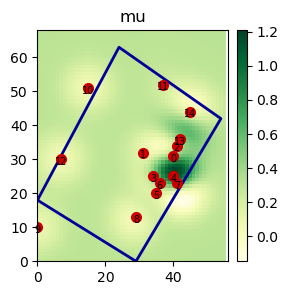

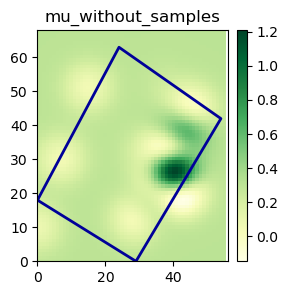

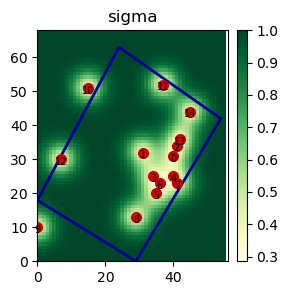

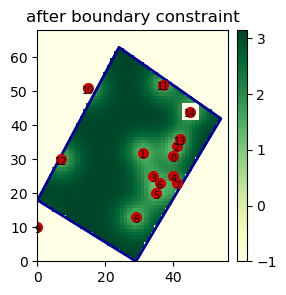

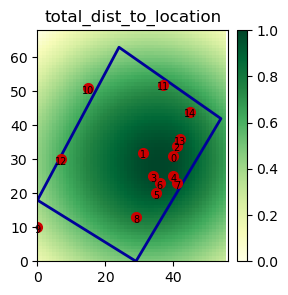

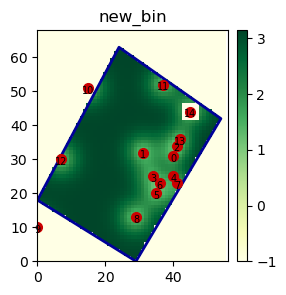

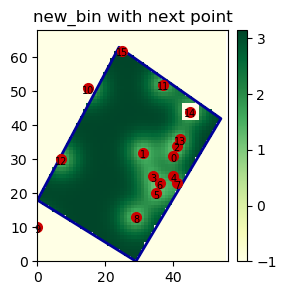

---------
[INFO] [1728591159.931017]:  | Sending Adaptive Algorithm Location (GPS|Map|Grid): (40.47231830929907, -79.96621273111947) | (6.375, 15.625) | [25, 62] 
[INFO] [1728591159.972810]:  < Status: Received next scan loc > 
[INFO] [1728591159.973765]: ----------- Manager Loop END -----------
[INFO] [1728591159.975302]: ----------- Manager Loop: adaptive -----------
[INFO] [1728591159.976274]:  < Status: Navigating to scan loc > 
[INFO] [1728591159.983472]:  | Goal Sent to movebase...


[WARN] [1728591159.971735]: Sending location to GUI failed


[INFO] [1728591197.634984]:  | Movebase Goal Reached, Backing up...
[INFO] [1728591199.139564]:  < Status: Arrived at scan loc > 
[INFO] [1728591199.140767]: ----------- Manager Loop END -----------
[INFO] [1728591199.142501]: ----------- Manager Loop: adaptive -----------
[INFO] [1728591199.143788]:  < Status: Arm lowering > 
[INFO] [1728591213.208801]:  < Status: Arm lowered > 
[INFO] [1728591213.210080]: ----------- Manager Loop END -----------
[INFO] [1728591213.211659]: ----------- Manager Loop: adaptive -----------
[INFO] [1728591213.212686]:  < Status: Scanning > 
[INFO] [1728591213.213666]: ----------- Manager Loop END -----------
Finished scan


In [28]:
for i in range(0,1):
    # print(f" ----- PATH LENGTH: {m.adaptiveROS.path_len} -----")
    
    while (m.status != SCANNING and
        m.status != ERROR):
        while ( m.status == ARRIVED_AT_SCAN_LOC or
                m.status == ARM_RETURNED):
                m.run_once()
        m.run_once()
        # print(f'GPR Kernel: {m.adaptiveROS.gp.kernel_}')
    
    while (m.status == SCANNING):
        rospy.sleep(2)
        
    print(m.status)

In [ ]:
if (m.status != SCANNING and
    m.status != ERROR):
    while ( m.status == ARRIVED_AT_SCAN_LOC or
            m.status == ARM_RETURNED):
            m.run_once()
    m.run_once()
    print(f'GPR Kernel: {m.adaptiveROS.gp.kernel_}')

print(m.status)

In [ ]:
for i in range(0,4):
    if (m.status != SCANNING and
        m.status != ERROR):
        while ( m.status == ARRIVED_AT_SCAN_LOC or
                m.status == ARM_RETURNED):
                m.run_once()
        m.run_once()

In [ ]:
m.show()

In [ ]:
sampled = [[m.adaptiveROS.sampled[0][1], m.adaptiveROS.sampled[0][0]]]
# sampled = m.adaptiveROS.sampled
print(sampled)
m.adaptiveROS.gp.fit(sampled, 
                     m.adaptiveROS.sampled_val) #todo: Should we re-init self.gp?

nextScanLoc = m.adaptiveROS.predict(True)

In [ ]:
nav_goal_map = m.conversion.grid2map(nextScanLoc[0], nextScanLoc[1])
nav_goal_gps = m.conversion.map2gps(nav_goal_map[0], nav_goal_map[1])
        
m.send_location_to_GUI(nav_goal_gps[0], nav_goal_gps[1])

In [ ]:
import pickle


In [ ]:
for i in range(0,20):
    if (m.status != SCANNING and
        m.status != ERROR):
        m.run_once()
        input()

In [ ]:
with open('nrec_sep_13_adaptiveROS.pkl', 'wb') as file:
    pickle.dump(m.adaptiveROS, file)

In [ ]:
with open('nrec_sep_13_transformer_variables.pkl', 'wb') as file:
    pickle.dump(member_vars, file)

In [ ]:
member_vars.pop('adaptiveROS')

In [ ]:
member_vars['tran

In [ ]:
for i in range(0,20):
    if (m.status != SCANNING and
        m.status != ERROR):
        m.run_once()
        input()

In [ ]:
m.show()